# TP 4

### Par Mathieu Marquis, Charles-Antoine Parent et Thomas Piuze

In [1]:
import numpy as np
import scipy as sp
import graphinglib as gl
import networkx as nx
from typing import Callable

import warnings
warnings.simplefilter("ignore")

## 4.1 : Intégration numérique de la dynamique épidémiologique SIS

### **a)** Identifiez les deux états stationnaires $0 \leq i^*_{1,2} \leq 1$ pour lesquels $\frac{di}{d\tau} = 0$, de même que les conditions sur $R_0$ pour lesquelles ces états stationnaires sont possibles (s’il y a lieu).

À partir de l'équation suivante:
$$ \frac{di}{d\tau} = (R_0-1)i-R_0i^2, $$
nous pouvons identifier les deux états stationnaires:
$$ \begin{align*}
    0 &= (R_0-1)i-R_0i^2 \\
    0 &= i(R_0-1-R_0i) \\
    i &= \begin{cases}
            0 \\
            \frac{R_0-1}{R_0}
        \end{cases}
    \end{align*} $$
Un premier état stationnaire se produit pour $i^*_1=0$, ce qui est logique, car en l'absence d'individus infectés, la maladie ne peut se propager. Un deuxième cas, moins intuitif, se produit pour $i^*_2=\frac{R_0-1}{R_0}$. Le premier cas n'implique aucune condition sur $R_0$. En revanche, le deuxième cas restreint les valeurs possibles de $R_0$, car nous devons avoir $0 \leq i^*_2 \leq 1$. Puisque $R_0=\beta/\alpha$, et que $\alpha,\beta>0$, $R_0$ est toujours positif. Nous avons donc:
$$ \begin{align*}
        0 &\leq \frac{R_0-1}{R_0} \leq 1 \\
        0 &\leq R_0-1 \leq R_0 \\
        1 &\leq R_0 \leq R_0+1
    \end{align*} $$
La condition $R_0 \leq R_0+1$ est redondante. Cependant, la condition $R_0 \geq 1$ est plus restrictive, car elle nécessite que $\beta \geq \alpha$.

### **b)** Obtenez une solution analytique $i(\tau)$ (valide pour $i \geq 0$). Vous noterez $i(0) = i_0$. Indice : Il s’agit d’une EDO de Bernouilli.

L'EDO de Bernouilli à résoudre est:
$$ \frac{di}{d\tau} = (R_0-1)i-R_0i^2 $$
Multiplions cette équation par $-1/i^2$:
$$ -\frac{1}{i^2}\frac{di}{d\tau} = \frac{(1-R_0)}{i}+R_0 $$ 
Posons ensuite le changement de variable $u=\frac{1}{i}$, de telle sorte que:
$$ u = \frac{1}{i} \longrightarrow \frac{du}{d\tau} = \frac{du}{di}\frac{di}{d\tau} = -\frac{1}{i^2}\frac{di}{d\tau} $$
L'équation à résoudre devient alors:
$$ \frac{du}{d\tau} = (1-R_0)u+R_0 $$
Soit une équation différentielle ordinaire linéaire du premier ordre. La forme générale d'une telle équation est:
$$ y'(x)+p(x)y(x) = q(x) $$
Dont la solution générale est donnée par:
$$ y(x) = e^{-\int p(x)dx}\left(\int e^{\int p(x)dx}q(x)dx+C\right) $$
Où $C$ est une constante déterminée par la condition initiale. Dans notre cas, $x=\tau$, $y(x)=u(\tau)$, $y'(x)=\frac{du(\tau)}{d\tau}$, $p(x)=(R_0-1)$ et $q(x)=R_0$. La solution est donc:
$$ \begin{align*}
        u(\tau) &= e^{-\int (R_0-1)d\tau}\left(\int e^{\int (R_0-1)d\tau}R_0d\tau+C\right) \\
        &= e^{-(R_0-1)\tau}\left(\int R_0e^{(R_0-1)\tau}d\tau+C\right) \\
        &= e^{-(R_0-1)\tau}\left(\frac{R_0}{R_0-1}e^{(R_0-1)\tau}+C\right) \\
        &= Ce^{-(R_0-1)\tau}+\frac{R_0}{R_0-1}
    \end{align*} $$
Nous sommes conscients que pour les intégrales effectuées, certaines constantes d'intégration ont été négligées. Elles n'affectent toutefois pas la forme finale de la solution, qui reste parfaitement valide. Puisque $i(0)=i_0$, $u(0)=\frac{1}{i(0)}=\frac{1}{i_0}$ :
$$ u(0) = C+\frac{R_0}{R_0-1} = \frac{1}{i_0} \longrightarrow C = \frac{1}{i_0}-\frac{R_0}{R_0-1} $$
Donc:
$$ \begin{align*}
        u(\tau) &= \left(\frac{1}{i_0}-\frac{R_0}{R_0-1}\right)e^{-(R_0-1)\tau}+\frac{R_0}{R_0-1} \\
        i(\tau) &= \frac{1}{u(\tau)} \\
        i(\tau) &= \frac{1}{\left(\frac{1}{i_0}-\frac{R_0}{R_0-1}\right)e^{-(R_0-1)\tau}+\frac{R_0}{R_0-1}} \\
        i(\tau) &= \frac{i_0(R_0-1)}{\left(R_0(1-i_0)-1\right)e^{-(R_0-1)\tau}+R_0i_0}
    \end{align*} $$
Soit la solution recherchée.

### **c)** Implémentez les intégrateurs d’Euler, de Runge-Kutta d’ordre 2 et de Runge-Kutta d’ordre 4. Vos fonctions devront retourner les trajectoires composées des fractions de la population infectée $\{i_s\}_{s=0,...,T}$ et des temps $\{\tau_s\}_{s=0,...,T}$ auxquels ces fractions correspondent. La valeur de $T$ sera fixée ci-dessous.

Le code suivant implante la solution analytique, l'équation différentielle de même que les trois intégrateurs. La solution analytique de même que les trois solutions obtenues avec les intégrateurs sont ensuite pour $\tau\in[0,10]$, $h=0.01$, $i_0=0.8$ et $R_0=0.1$.

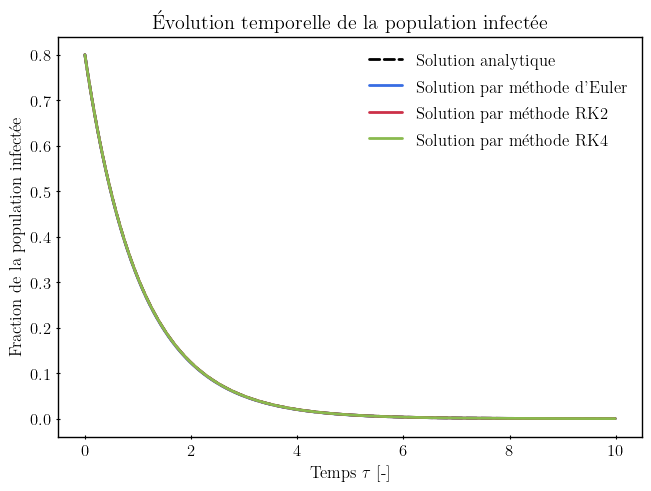

In [2]:
def sol_analytique(t: float, i_0: float, R_0: float) -> float:
    """
    Solution analytique de l'équation différentielle ordinaire.
    """
    return i_0*(R_0-1)/((R_0*(1-i_0)-1)*np.e**(-(R_0-1)*t)+R_0*i_0)

def f(i: float, t: float, R_0: float) -> float:
    """
    Fonction représentant l'équation différentielle ordinaire.
    """
    return (R_0 - 1)*i - R_0 * i**2

def euler(func: Callable, a: float, b:float, h:float, x0: float, *init_params) -> tuple[np.ndarray, np.ndarray]:
    """
    Méthode d'Euler pour résoudre une équation différentielle ordinaire.
    
    Paramètres
    ----------
    func (Callable) : Fonction représentant l'équation différentielle.
    a (float) : Paramètre initial.
    b (float) : Paramètre final.
    h (float) : Pas de temps.
    x0 (float) : Valeur initiale de la solution.
    init_params : Paramètres initiaux supplémentaires pour la fonction.

    Retourne
    -------
    tpoints (np.ndarray) : Points de temps.
    xpoints (np.ndarray) : Valeurs de la solution à chaque point de temps.
    """
    tpoints = np.arange(a, b, h)
    xpoints = np.zeros_like(tpoints)
    x = x0
    for i, t in enumerate(tpoints):
        xpoints[i] = x
        x += h * func(x, t, *init_params)
    return tpoints, xpoints

def rk2(func: Callable, a: float, b:float, h:float, x0: float, *init_params) -> tuple[np.ndarray, np.ndarray]:
    """
    Méthode de Runge-Kutta d'ordre 2 pour résoudre une équation différentielle ordinaire.
    
    Paramètres
    ----------
    func (Callable) : Fonction représentant l'équation différentielle.
    a (float) : Paramètre initial.
    b (float) : Paramètre final.
    h (float) : Pas de temps.
    x0 (float) : Valeur initiale de la solution.
    init_params : Paramètres initiaux supplémentaires pour la fonction.

    Retourne
    -------
    tpoints (np.ndarray) : Points de temps.
    xpoints (np.ndarray) : Valeurs de la solution à chaque point de temps.
    """
    tpoints = np.arange(a, b, h)
    xpoints = np.zeros_like(tpoints)
    x = x0
    for i, t in enumerate(tpoints):
        xpoints[i] = x
        k1 = func(x, t, *init_params)
        k2 = func(x + h * k1 / 2, t + h / 2, *init_params)
        x += h * k2
    return tpoints, xpoints

def rk4(func: Callable, a: float, b:float, h:float, x0: float, *init_params) -> tuple[np.ndarray, np.ndarray]:
    """
    Méthode de Runge-Kutta d'ordre 4 pour résoudre une équation différentielle ordinaire.
    
    Paramètres
    ----------
    func (Callable) : Fonction représentant l'équation différentielle.
    a (float) : Paramètre initial.
    b (float) : Paramètre final.
    h (float) : Pas de temps.
    x0 (float) : Valeur initiale de la solution.
    R_0 (float) : Nombre de reproduction de base.
    init_params : Paramètres initiaux supplémentaires pour la fonction.

    Retourne
    -------
    tpoints (np.ndarray) : Points de temps.
    xpoints (np.ndarray) : Valeurs de la solution à chaque point de temps.
    """
    tpoints = np.arange(a, b, h)
    xpoints = np.zeros_like(tpoints)
    x = x0
    for i, t in enumerate(tpoints):
        xpoints[i] = x
        k1 = func(x, t, *init_params)
        k2 = func(x + h * k1 / 2, t + h / 2, *init_params)
        k3 = func(x + h * k2 / 2, t + h / 2, *init_params)
        k4 = func(x + h * k3, t + h, *init_params)
        x += (h / 6) * (k1 + 2*k2 + 2*k3 + k4)
    return tpoints, xpoints


t, i = euler(f, 0, 10, 0.01, 0.8, 0.1)
fig = gl.Figure(r'Temps $\tau$ [-]', 'Fraction de la population infectée', 
                title='Évolution temporelle de la population infectée')
fig.add_elements(
    gl.Curve(t, sol_analytique(t, 0.8, 0.1), label='Solution analytique', color='k', line_style='--'),
    gl.Curve(t, i, label="Solution par méthode d'Euler"),
    gl.Curve(t, rk2(f, 0, 10, 0.01, 0.8, 0.1)[1], label="Solution par méthode RK2"),
    gl.Curve(t, rk4(f, 0, 10, 0.01, 0.8, 0.1)[1], label="Solution par méthode RK4"),
)
fig.show()

Ce graphique permet de voir que les quatre solutions sont parfaitement superposées. Cela constitue une confirmation supplémentaire de la validité des méthodes implantées.

### **d)** Implémentez la méthode du ratio dorée (ou un autre optimisateur de votre choix) qui vous permettra de trouver la longueur de pas $h$ permettant d’obtenir une erreur sur la trajectoire numérique $\varepsilon(h)$ bornée par $(1\pm0.01)\delta$, où $\delta$ sera spécifiée ci-dessous. L’erreur sera calculée selon
$$ \varepsilon(h) = \sqrt{\frac{1}{T+1}\sum_{s=0}^T(i_s-i(\tau_s))^2}, $$
### où $i(\cdot)$ est la solution analytique obtenue en **b**. N’hésitez pas à considérer une méthode euristique pour bien cerner l’intervalle de départ pour $h$ fourni à la méthode du ratio doré. À l’aide de votre algorithme, identifiez une valeur de pas d’intégration $h$ permettant de limiter $\varepsilon(h)$ à l’intervalle $[0.99\delta,1.01\delta]$ pour plusieurs valeurs de $\delta \in [10^{-9},10^{-6}]$, pour plusieurs couples $(i_0,R_0)$ et pour chacun des trois intégrateurs implémentés en **c**. Utilisez $T = 3$. Une fois les valeurs de $h$ obtenues, représentez quelques-unes des trajectoires sur un graphique (pour des fins de visualisation seulement).

Le code suivant implante une méthode pour calculer l'erreur, de même qu'une méthode pour cerner l'intervalle de départ adéquat pour $h$ à fournir à la méthode du ratio doré. Les valeurs de $h$ obtenues pour 20 valeurs de $\delta$ entre $10^{-9}$ et $10^{-6}$ et pour trois couples $(i_0,R_0)$ sont ensuite illustrées pour les trois intégrateurs.

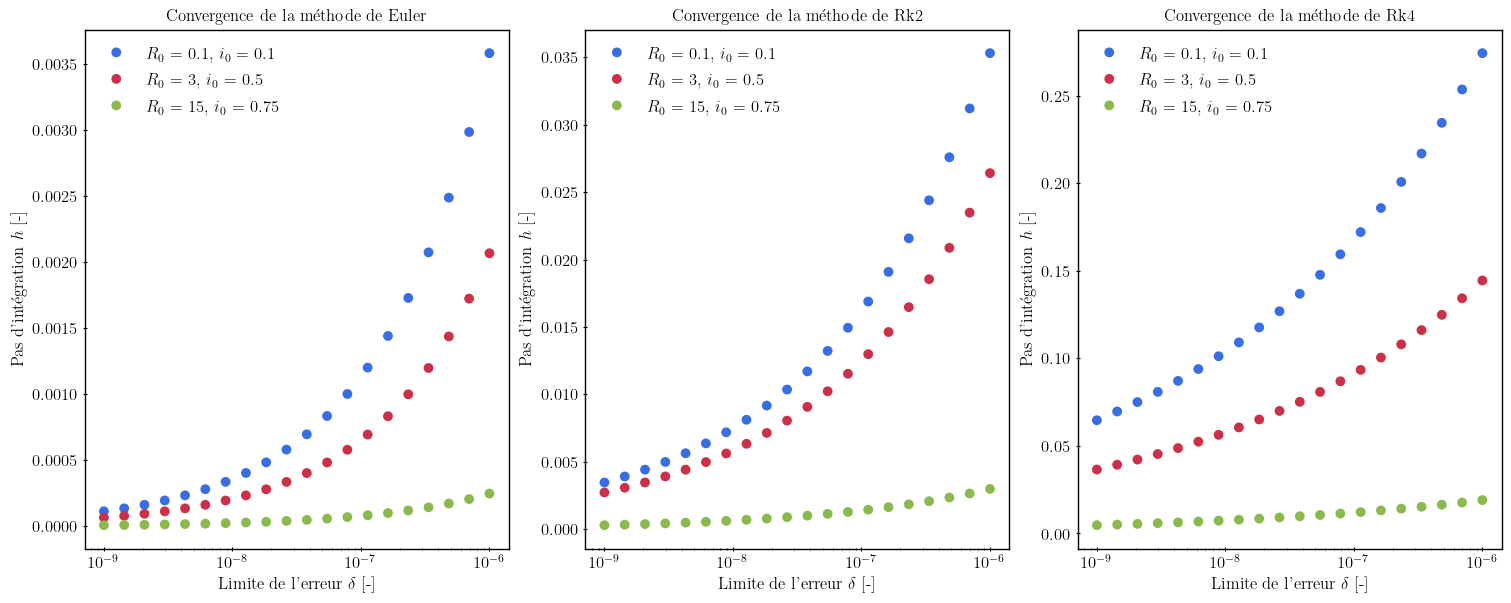

In [3]:
def epsilon(integrateur: Callable, h: float, i_0: float, R_0: float, T: float=3.0) -> float:
    """
    Calcule l'erreur entre la solution numérique et la solution analytique.

    Paramètres
    ----------
    integrateur (Callable) : Méthode d'intégration à utiliser (Euler, RK2, RK4).
    h (float) : Pas de temps.
    i_0 (float) : Valeur initiale de la solution.
    R_0 (float) : Nombre de reproduction de base.
    T (float) : Temps final.

    Retourne
    --------
    float : Erreur entre la solution numérique et la solution analytique.
    """
    t_s, i_s = integrateur(f, 0, (T+1)*h, h, i_0, R_0)
    i_analytique = sol_analytique(t_s, i_0, R_0)
    sum_ = np.sum((i_s - i_analytique)**2)
    return np.sqrt(sum_ / (T + 1))

def trouver_bornes_h(integrateur: Callable, T: float, i_0: float, R_0: float, delta: float) -> tuple[float, float]:
    """
    Trouve les bornes inférieure et supérieure pour le pas de temps h correspondant aux bornes d'une erreur de
    [0.99𝛅,1.01𝛅].

    Paramètres
    ----------
    integrateur (Callable) : Méthode d'intégration à utiliser (Euler, RK2, RK4).
    T (float) : Temps final.
    i_0 (float) : Valeur initiale de la solution.
    R_0 (float) : Nombre de reproduction de base.
    delta (float) : Erreur cible. La méthode renvoie les bornes pour une erreur de [0.99𝛅,1.01𝛅].

    Retourne
    --------
    tuple[float, float] : Bornes inférieure et supérieure pour le pas de temps h.
    """
    h_logspace = np.logspace(-6, 0, 1000)
    epsilon_vals = []
    for h in h_logspace:
        epsilon_vals.append(epsilon(integrateur, h, i_0, R_0, T))
    epsilon_vals = np.array(epsilon_vals)
    low_bound = h_logspace[np.where(epsilon_vals < 0.99 * delta)[0][-1]]
    high_bound = h_logspace[np.where(epsilon_vals > 1.01 * delta)[0][0]]
    return low_bound, high_bound

def ratio_dore(integrateur: Callable, delta: float, i_0: float, R_0: float, T: float=3.0, err=1e-8) -> float:
    """
    Trouve le pas de temps h correspondant à une erreur epsilon proche de delta en utilisant la méthode du ratio doré.

    Paramètres
    ----------
    integrateur (Callable) : Méthode d'intégration à utiliser (Euler, RK2, RK4).
    delta (float) : Erreur cible.
    i_0 (float) : Valeur initiale de la solution.
    R_0 (float) : Nombre de reproduction de base.
    T (float) : Temps final.
    err (float) : Erreur tolérée pour la convergence.

    Retourne
    --------
    float : Pas de temps h correspondant à une erreur epsilon proche de delta.
    """
    def fonction(h: float) -> float:
        return np.abs(epsilon(integrateur, h, i_0, R_0, T) - delta)

    z = (1 + np.sqrt(5)) / 2

    x1, x4 = trouver_bornes_h(integrateur, T, i_0, R_0, delta)
    x2 = x4 - (x4 - x1) / z
    x3 = x1 + (x4 - x1) / z

    while (x4-x1) > err:
        if fonction(x2) < fonction(x3):
            x4, x3 = x3, x2
            x2 = x4 - (x4 - x1) / z
        else:
            x2, x1 = x3, x2
            x3 = x1 + (x4 - x1) / z
    
    return (x4 + x1) / 2

def visualiser_convergence(integrateur: Callable, i_0s: list, R_0s: list, deltas: np.ndarray) -> gl.Figure:
    """
    Visualise la convergence de la méthode d'intégration choisie en fonction de différents pas de temps.

    Paramètres
    ----------
    integrateur (Callable) : Méthode d'intégration à utiliser (Euler, RK2, RK4).
    i_0s (list) : Liste des valeurs initiales de la solution.
    R_0s (list) : Liste des valeurs du nombre de reproduction de base.
    deltas (np.ndarray) : Liste des pas de temps.

    Retourne
    --------
    gl.Figure : Figure contenant les courbes de convergence.
    """
    hs = []
    for i in range(len(i_0s)):
        i_0, R_0 = i_0s[i], R_0s[i]
        h = []
        for d in deltas:
            h.append(ratio_dore(integrateur, d, i_0, R_0, T=3))
        hs.append(h)

    hs = np.array(hs)

    scatters = [gl.Scatter(deltas, hs[i], label=rf"$R_0$ = {ir[1]}, $i_0$ = {ir[0]}") 
                for i, ir in enumerate(zip(i_0s, R_0s))]

    # Visualisation de la convergence
    fig = gl.Figure(r"Limite de l'erreur $\delta$ [-]", r"Pas d'intégration $h$ [-]", 
                    title=f"Convergence de la méthode de {integrateur.__name__.capitalize()}", log_scale_x=True)
    fig.add_elements(
        *scatters
    )
    #fig.set_visual_params(use_latex=True)
    return fig

# Valeurs de delta
deltas = np.logspace(-9, -6, 20)

# Couples (i_0, R_0)
i_0s = [0.1, 0.5, 0.75]
R_0s = [0.1, 3, 15]

# Affichage de la figure
figs = []
methodes = [euler, rk2, rk4]
for integrateur in methodes:
    fig = visualiser_convergence(integrateur, i_0s, R_0s, deltas)
    figs.append(fig)

gl.MultiFigure.from_row(figs, size=(15, 6), reference_labels=False).show()

La méthode de Runge-Kutta d'ordre 2 nécessite des valeurs de $h$ environ 10 fois moins petites que la méthode d'Euler pour atteindre une précision similaire. De façon semblable, la méthode de Runge-Kutta d'ordre 4 permet d'accroître la valeur de $h$ d'un autre ordre de grandeur sans affecter la précision de la solution obtenue.

Nous pouvons ensuite représenter quelques trajectoires obtenues pour différentes valeurs de $h$:

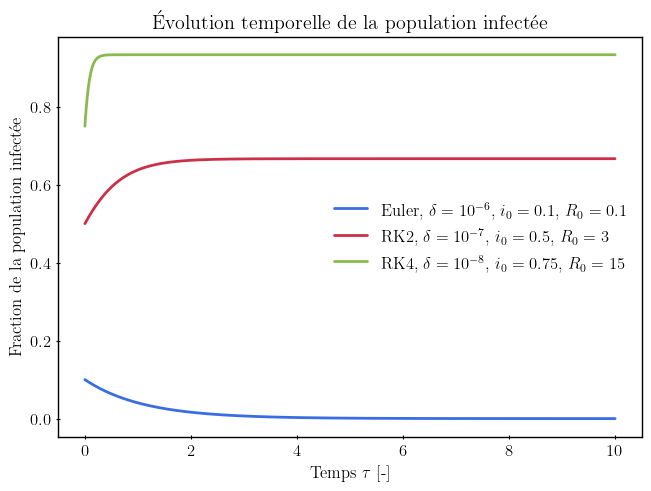

In [4]:
h_1 = ratio_dore(euler, 1e-6, 0.1, 0.1)
h_2 = ratio_dore(rk2, 1e-7, 0.5, 3)
h_3 = ratio_dore(rk4, 1e-8, 0.75, 15)

fig = gl.Figure(r'Temps $\tau$ [-]', 'Fraction de la population infectée',
                title='Évolution temporelle de la population infectée')
fig.add_elements(
    gl.Curve(*euler(f, 0, 10, h_1, 0.1, 0.1), label=r"Euler, $\delta=10^{-6}$, $i_0=0.1$, $R_0=0.1$"),
    gl.Curve(*rk2(f, 0, 10, h_2, 0.5, 3), label=r"RK2, $\delta=10^{-7}$, $i_0=0.5$, $R_0=3$"),
    gl.Curve(*rk4(f, 0, 10, h_3, 0.75, 15), label=r"RK4, $\delta=10^{-8}$, $i_0=0.75$, $R_0=15$"),
)
fig.show()

### **e)** À l’aide des résultats obtenus en **d**, obtenez numériquement l’ordre $d$ de l’erreur globale $\varepsilon(h) \propto h^d$ effectuée par chacun des trois intégrateurs implémentés en **c**. Il est possible d’obtenir $d$ via une régression (linéaire) en observant que $\log \varepsilon(h) \propto d \log h$.

In [5]:
def get_ordre(integrateur: Callable, a: float=-2, b: float=0, i_0: float=0.1, R_0: float=1.2, T: int=10000) -> float:
    """
    Calcule l'ordre de la méthode d'intégration choisie en fonction de l'erreur globale. Un ajustement linéaire sur le
    logarithme du pas de temps h en fonction de l'erreur est effectué pour déterminer l'ordre de la méthode (pente).
    
    Paramètres
    ----------
    integrateur (Callable) : Méthode d'intégration à utiliser (Euler, RK2, RK4).
    a (float) : Borne inférieure pour le pas de temps h.
    b (float) : Borne supérieure pour le pas de temps h.
    i_0 (float) : Valeur initiale de la solution.
    R_0 (float) : Nombre de reproduction de base.
    T (int) : Temps final.
    
    Retourne
    --------
    float : Ordre de la méthode d'intégration.
    """
    h = np.logspace(a, b, 200)
    e = []
    for p in h:
        e.append(epsilon(integrateur, p, i_0, R_0, 10000))
    x, y = np.log(h[1:]), np.log(e[1:])
    return np.polyfit(x, y, 1)[0]


print(f"Ordre de l'erreur globale de la méthode d'Euler:", get_ordre(euler, -5))
print(f"Ordre de l'erreur globale de la méthode de RK2:", get_ordre(rk2, -5))
print(f"Ordre de l'erreur globale de la méthode de RK4:", get_ordre(rk4, -2))

Ordre de l'erreur globale de la méthode d'Euler: 1.0761940305492677
Ordre de l'erreur globale de la méthode de RK2: 2.1246608382525487
Ordre de l'erreur globale de la méthode de RK4: 3.5123658827554776


Pour obtenir l'erreur globale, nous devons calculer l'erreur pour un très grand nombre de pas (ici $10000$).

Pour la méthode d'Euler, il est attendu d'obtenir une erreur d'ordre 1, puisque l'erreur est proportionnelle à $h$, et la régression effectuée est cohérente.

Pour la méthode de Runge-Kutta d'ordre 2, l'erreur est proportionnelle à $h^2$, et la régression semble encore une fois être cohérente.

Pour la méthode de Runge-Kutta d'ordre 4, l'erreur est proportionnelle à $h^4$, et la régression est moins cohérente que pour les deux autres méthode. 

Toutefois, il est observé que les paramètres initiaux tels que $a$, $i_0$ et $R_0$ affectent énormément l'ordre de l'erreur trouvé. Cela peut être causé en partie par la forme de la fonction qui varie selon les paramètres, et les méthodes d'intégration sont alors moins efficaces pour certains paramètres que pour d'autres. On note d'ailleurs que les combinaisons de $a$, $i_0$ et $R_0$ ont été choisies pour permettre d'obtenir des ordres aussi près de valeurs entières que possible. Les écarts subsistants de même que les variations d'ordre sont donc probablement causés par des limitations numériques et les particularités des fonctions intégrées.

## 4.2 : Simulation Monte-Carlo de la dynamique SIS

### **a)** Déterminez l’expression qui gouverne la probabilité de générer un graphe de l’ensemble $G(n,p)$ qui contiendra $m$ liens. Détaillez votre raisonnement pour obtenir cette expression.

La probabilité qu'un lien se crée est $p$, ce qui signifie que la probabilité qu'un lien soit refusé est $(1-p)$. Pour un ensemble de $n$ noeuds, le nombre possible de liens entre deux noeuds différents est le coefficient binomial ${n}\choose{2}$, c'est-à-dire:
$$ \begin{align*}
        {n}\choose{2}  &=  \frac{n!}{2!(n-2)!} = \frac{n(n-1)(n-2)!}{2(n-2)!} = \frac{n(n-1)}{2} 
    \end{align*} $$
Ce résultat peut aussi être obtenu par la logique suivante. Choisissons un premier noeud parmi les $n$ noeuds. Ce noeud peut créer jusqu'à $n-1$ liens avec tous les autres noeuds du graphe. Prenons ensuite un second noeud. Ce deuxième noeud peut également créer $n-1$ liens avec ses voisins. Or, un de ces $n-1$ liens est avec le premier noeud, et a donc déjà été compté. Il y a donc $n-2$ nouveaux liens possibles. Pour le troisième noeud, il y aura $n-3$ nouveaux liens possibles, et ainsi de suite. Pour l'avant-dernier noeud, il ne restera plus qu'un nouveau lien possible à créer, et pour le dernier noeud, il n'y en aura aucun. Le nombre possible de liens est donc:
$$ n-1+n-2+n-3+...+1+0 = \sum_{i=1}^{n-1}i $$
Il existe une manière ingénieuse d'effectuer cette sommation. Exprimons-la deux fois en inversant l'ordre des termes:
$$ \begin{align*}
        \sum_{i=1}^{n-1}i &= 1 + 2 + ... + n-2 + n-1 \\
        \sum_{i=1}^{n-1}i &= n-1 + n-2 + ... + 2 + 1
    \end{align*} $$
On remarque qu'en additionnant les termes occupant la même position dans la sommation, on obtient $n-1$ fois $n$. Ainsi:
$$ 2\sum_{i=1}^{n-1}i = n(n-1) \longrightarrow \sum_{i=1}^{n-1}i = \frac{n(n-1)}{2} $$
Ce qui montre que le nombre de liens possibles est $\frac{n(n-1)}{2}$, que nous appellerons pour la suite ${n}\choose{2}$, car ces deux expressions sont équivalentes. Pour revenir à la question, la probabilité $P(m)$ que $m$ liens soient créés et que les ${{n}\choose{2}} - m$ autres liens soient refusés est simplement:
$$ P(m) = p^m(1-p)^{{{n}\choose{2}}-m} $$
Or, il y a plus d'un seul graphe comportant $m$ liens, car il y a ${{n}\choose{2}}\choose{m}$ combinaisons possibles de $m$ liens. La probabilité totale de générer un graphe de l'ensemble $G(n,p)$ comportant $m$ liens, peu importe ces liens, est donc:
$$ P_{tot}(m) = {{{n}\choose{2}}\choose{m}}p^m(1-p)^{{{n}\choose{2}}-m} $$
Ce qui correspond à une distribution binomiale.

### **b)** Déterminez également le nombre de liens moyens que possède un graphe issu du modèle $G(n,p)$ ainsi que l’écart-type sur le nombre de liens. Détaillez votre raisonnement pour obtenir ces expressions. Si des propriétés sont utilisées, elles doivent être dûment citées et/ou démontrées également.

Nous avons déterminé en **a)** que le nombre total de liens possibles pour un tel graphe est ${n}\choose{2}$. Chacun de ces liens a une probabilité $p$ d'être créé. Logiquement, le nombre de liens moyen devrait donc être $p{{n}\choose{2}}$.

Reprenons également le résultat obtenu en **a)** pour la probabilité de générer un graphe de l'ensemble $G(n,p)$ comportant $m$ liens:
$$ P(m) = {{{n}\choose{2}}\choose{m}}p^m(1-p)^{{{n}\choose{2}}-m} $$
Nous avons conclu que cette probabilité est de la forme d'une distribution binomiale. Selon le PowerPoint *Processus aléatoires et méthodes Monte Carlo* [1], une telle distribution est de la forme:
$$ P(k) = {{N}\choose{k}}p^k(1-p)^{N-k} $$
Et la variance de cette distribution est:
$$ \text{var } k = Np(1-p) $$
Ce qui correspond à un écart-type de:
$$ \sigma = \sqrt{\text{var } k} = \sqrt{Np(1-p)} $$
En posant $k=m$ et $N={{n}\choose{2}}$, on retrouve la distribution binomiale obtenue. Son écart-type est donc:
$$ \sigma = \sqrt{{{n}\choose{2}}p(1-p)} $$



### **c)** Implémentez un algorithme qui génère des graphes en utilisant le modèle d’Erdős–Rényi avec les paramètres $n = 100$ et $p = 0.05$. Une fois programmé, obtenez empiriquement la moyenne, l’écart-type et la distribution du nombre de liens dans les réseaux issus de votre algorithme. Comparez ces résultats aux valeurs obtenues en **a** et **b**. (Indice : un graphe est parfois simplement représenté par sa matrice d’adjacence. Vous pouvez utiliser cette représentation ou une autre structure de votre choix qui permet d’encoder l’information pertinente.)

Le code suivant utilise la représentation par matrice d'adjacence pour générer des graphes selon le modèle d’Erdős–Rényi. Il génère ensuite une distribution de 10000 graphes et calcule la moyenne du nombre de liens de même que leur écart-type. Ces paramètres empiriques sont affichés aux côtés des paramètres théoriques.

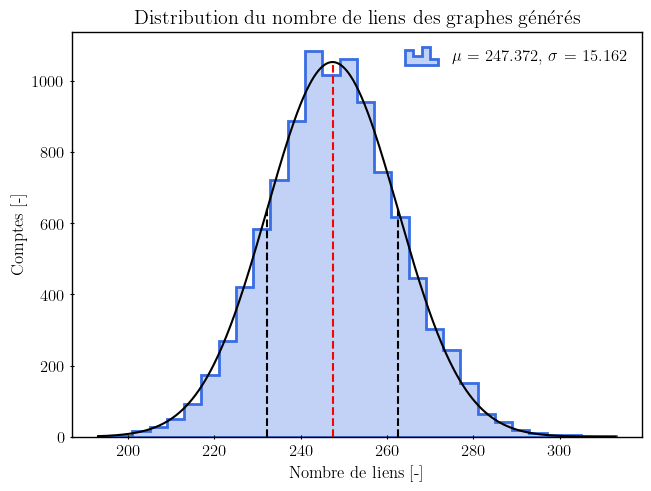

Moyenne théorique : 247.5
Moyenne empirique : 247.3717
Écart relatif : 0.0518%

Écart-type théorique : 15.333786225195654
Écart-type empirique : 15.162016327322696
Écart relatif : 1.1202%



In [6]:
def graph_generator(n: int=100, p: float=0.05) -> np.ndarray:
    """
    Génère un graphe aléatoire de Erdős-Rényi.

    Paramètres
    ----------
    n : int, default=100
        Nombre de noeuds du graphe.
    p : float, default=0.05
        Probabilité d'avoir un lien entre deux noeuds.

    Retourne
    --------
    np.ndarray
        Matrice d'adjacence du graphe généré, de taille (n,n). La matrice est symétrique.
    """
    prob = np.random.rand(n, n)
    adjacence1 = prob <= p
    np.fill_diagonal(adjacence1, False)  # Zéros sur la diagonale
    adjacence2 = np.triu(adjacence1) + np.tril(adjacence1.T)  # Pour symétriser la matrice d'adjacence
    return adjacence2  # Retourne un array où les True correspondent aux liens

def distribution_generator(
        size: int=10000, n: int=100, p: float=0.05
) -> tuple[tuple[float, float], tuple[float, float], np.ndarray]:
    """
    Génère une distribution de graphes aléatoires et calcule la moyenne et l'écart-type du nombre de liens pour
    l'ensemble des graphes générés.

    Paramètres
    ----------
    size : int, default=10000
        Nombre de graphes à générer.
    n : int, default=100
        Nombre de noeuds du graphe.
    p : float, default=0.05
        Probabilité d'avoir un lien entre deux noeuds.

    Retourne
    --------
    tuple[tuple[float, float], tuple[float, float], np.ndarray]
        Moyenne, écart-type et distribution du nombre de liens pour l'ensemble des graphes générés. La moyenne et
        l'écart-type sont retournés sous forme de tuples contenant la valeur empirique et la valeur théorique.
    """
    distribution = np.zeros(size)
    for i in range(size):
        distribution[i] = np.count_nonzero(graph_generator(n, p))/2 
        # La division par 2 est effectuée car chaque lien est compté deux fois dans la matrice d'adjacence
    moyenne = (np.mean(distribution), p*n*(n-1)/2)
    ecart_type = (np.std(distribution), (p*(1-p)*n*(n-1)/2)**0.5)
    return moyenne, ecart_type, distribution

mean, std, values = distribution_generator()
histogram = gl.Histogram(values, number_of_bins=30, normalize=False)
histogram.add_pdf()
fig = gl.Figure('Nombre de liens [-]', 'Comptes [-]', title="Distribution du nombre de liens des graphes générés")
fig.add_elements(histogram)
fig.show()

print(f"Moyenne théorique : {mean[1]}\nMoyenne empirique : {mean[0]}")
print(f"Écart relatif : {np.abs(mean[0]/mean[1] - 1)*100:.4f}%\n")
print(f"Écart-type théorique : {std[1]}\nÉcart-type empirique : {std[0]}")
print(f"Écart relatif : {np.abs(std[0]/std[1] - 1)*100:.4f}%\n")


On constate que les valeurs théoriques s'accordent bien aux valeurs empiriques, avec de très petits écarts relatifs. Ces résultats peuvent également être vérifiés à l'aide du module `NetworkX`:

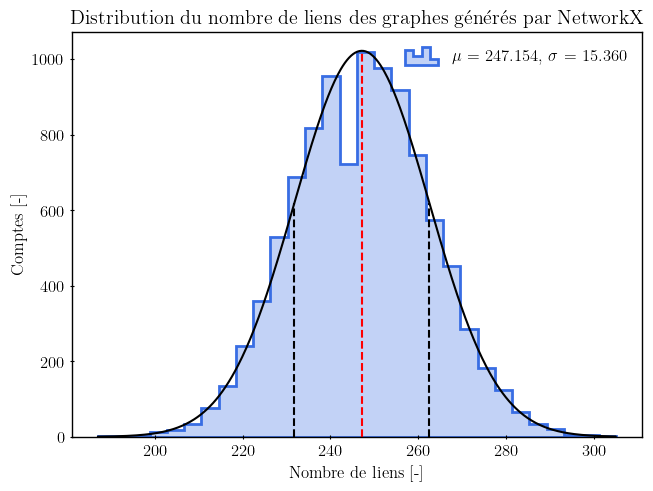

Moyenne théorique: 247.5
Moyenne empirique: 247.154
Écart relatif : 0.1398%

Écart-type théorique: 15.333786225195654
Écart-type empirique: 15.360080859162169
Écart relatif : 0.1715%



In [7]:
# Vérification avec NetworkX

def distribution_generator_networkx(
        size: int=10000, n: int=100, p: float=0.05
) -> tuple[tuple[float, float], tuple[float, float], np.ndarray]:
    """
    Génère une distribution de graphes aléatoires en utilisant NetworkX et calcule la moyenne et l'écart-type du
    nombre de liens pour l'ensemble des graphes générés.

    Paramètres
    ----------
    size : int, default=10000
        Nombre de graphes à générer.
    n : int, default=100
        Nombre de noeuds du graphe.
    p : float, default=0.05
        Probabilité d'avoir un lien entre deux noeuds.
    
    Retourne
    --------
    tuple[tuple[float, float], tuple[float, float], np.ndarray]
        Moyenne, écart-type et distribution du nombre de liens pour l'ensemble des graphes générés. La moyenne et
        l'écart-type sont retournés sous forme de tuples contenant la valeur empirique et la valeur théorique.
    """
    distribution = np.zeros(size)
    for i in range(size):
        distribution[i] = nx.erdos_renyi_graph(n, p).number_of_edges()
    moyenne = (np.mean(distribution), p*n*(n-1)/2)
    ecart_type = (np.std(distribution), (p*(1-p)*n*(n-1)/2)**0.5)
    return moyenne, ecart_type, distribution

mean, std, values = distribution_generator_networkx()
histogram = gl.Histogram(values, number_of_bins=30, normalize=False)
histogram.add_pdf()
fig = gl.Figure('Nombre de liens [-]', 'Comptes [-]', 
                title="Distribution du nombre de liens des graphes générés par NetworkX")
fig.add_elements(histogram)
fig.show()

print(f'Moyenne théorique: {mean[1]}', f'Moyenne empirique: {mean[0]}', sep='\n')
print(f"Écart relatif : {np.abs(mean[0]/mean[1] - 1)*100:.4f}%\n")
print(f'Écart-type théorique: {std[1]}', f'Écart-type empirique: {std[0]}', sep='\n')
print(f"Écart relatif : {np.abs(std[0]/std[1] - 1)*100:.4f}%\n")

Encore une fois, les valeurs théoriques et empiriques sont très près les unes des autres, avec des écarts relatifs très faibles.

Il aurait été intéressant de comparer ces deux méthodes plus directement, comme en utilisant le même *seed*, pour voir si les résultats concordent exactement. Cependant, étant donné que les méthodes de création de graphe ne font pas utilisation des mêmes fonctions, ni des mêmes séquences d'appel, il est impossible de retomber exactement sur les mêmes résultats. Nous pouvons donc nous contenter de la comparaison des écarts relatifs pour établir la proximité avec les valeurs théoriques dans les deux cas.

### **d)** Implémentez la simulation de la dynamique SIS sur réseau en utilisant le module `NetworkX`. Une fois votre algorithme fonctionnel, générez les courbes moyennes du nombre de nœuds infectés et susceptibles en fonction du temps pour le réseau fourni (*reseau.adj*). Pour ouvrir ce réseau, utilisez la fonction `read_adjlist()` de `NetworkX`. Pour vos simulations, utilisez $\alpha = 0.05$, $\beta = 0.1$, une proportion initiale de nœuds infectés de 10% et 100 pas de temps. Comparez les résultats de la simulation avec le modèle étudié dans la première partie du travail et discutez.

Le code suivant implémente d'abord la simulation du modèle SIS. Il implante ensuite une fonction permettant de calculer le nombre moyen de noeuds infectés et susceptibles à chaque pas de temps pour un certain nombre de simulations. Les courbes obtenues lorsque ce code est appliqué au réseau fourni sont finalement présentées. Pour obtenir ces courbes, 100 simulations ont été moyennées.

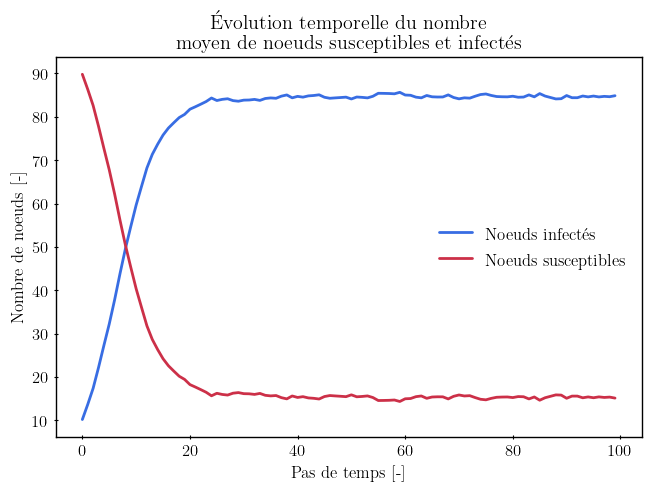

In [8]:
graph = nx.read_adjlist('devoirs/tp4/reseau.adj')

def sis_model(
        G: nx.classes.graph.Graph, alpha: float=0.05, beta: float=0.1, init: float=0.1, n: int=100
) -> tuple[np.ndarray, np.ndarray]:
    """
    Implémente le modèle SIS (Susceptible-Infecté-Susceptible) sur un graphe donné.

    Paramètres
    ----------
    G : nx.classes.graph.Graph
        Graphe sur lequel le modèle est appliqué.
    alpha : float, default=0.05
        Taux de guérison des noeuds infectés.
    beta : float, default=0.1
        Taux de contamination des noeuds susceptibles par les noeuds infectés voisins.
    init : float, default=0.1
        Proportion initiale de noeuds infectés dans le graphe.
    n : int, default=100
        Nombre de pas de temps pour l'évolution du modèle.

    Retourne
    --------
    tuple[np.ndarray, np.ndarray]
        Deux arrays numpy contenant le nombre de noeuds infectés et susceptibles à chaque pas de temps, de taille (n,).
    """
    # Initialisation des arrays contenant le nombre de noeuds infectés et susceptibles en fonction du temps
    infectes = np.zeros(n)
    susceptibles = np.zeros(n)

    # Initialisation des noeuds infectés
    labels = {}
    for x in range(len(G.nodes())):
        if np.random.rand() <= init:
            labels[f'{x}'] = 1 # Noeuds infectés
        else:
            labels[f'{x}'] = 0 # Noeuds susceptibles
    nx.set_node_attributes(G, labels, name='init')
    nx.set_node_attributes(G, labels, name='final')

    # Évolution du graphe
    for t in range(n): # Boucle temporelle
        i, s = 0, 0
        for x in range(len(G.nodes())):
            if G.nodes[f'{x}']['init'] == 1:
                i += 1 # Incrémentation du nombre de noeuds infectés
                if np.random.rand() <= alpha:
                    G.nodes[f'{x}']['final'] = 0 # Guérison des noeuds infectés
                else:
                    for k in G.neighbors(f'{x}'):
                        if G.nodes[f'{k}']['init'] != 1:
                            if np.random.rand() <= beta:
                                G.nodes[f'{k}']['final'] = 1 # Contamination des noeuds susceptibles voisins
            else:
                s += 1 # Incrémentation du nombre de noeuds suceptibles
        infectes[t], susceptibles[t] = i, s
        for x in range(len(G.nodes())):
            G.nodes[f'{x}']['init'] = G.nodes[f'{x}']['final'] # Application de la guérison/contamination

    return infectes, susceptibles

def moyennes(G: nx.classes.graph.Graph, taille: int=100, intervalles: int=100) -> tuple[np.ndarray, np.ndarray]:
    """
    Calcule la moyenne du nombre de noeuds infectés et susceptibles sur plusieurs simulations du modèle SIS.

    Paramètres
    ----------
    G : nx.classes.graph.Graph
        Graphe sur lequel le modèle est appliqué.
    taille : int, default=100
        Nombre de simulations à effectuer.
    intervalles : int, default=100
        Nombre de pas de temps pour l'évolution du modèle.
    
    Retourne
    --------
    tuple[np.ndarray, np.ndarray]
        Deux arrays numpy contenant la moyenne du nombre de noeuds infectés et susceptibles à chaque pas de temps, de
        taille (intervalles,).
    """
    infectes, susceptibles = np.zeros(intervalles), np.zeros(intervalles)
    for k in range(taille):
        i, s = sis_model(G, n=intervalles)
        infectes += i
        susceptibles += s
    return infectes/taille, susceptibles/taille

i, s = moyennes(graph)
t = np.arange(len(i))

fig = gl.Figure('Pas de temps [-]', 'Nombre de noeuds [-]',
                title='Évolution temporelle du nombre\nmoyen de noeuds susceptibles et infectés')
fig.add_elements(
    gl.Curve(t, i, label='Noeuds infectés'),
    gl.Curve(t, s, label='Noeuds susceptibles'),
)
fig.show()

En utilisant le modèle étudié dans la première partie du travail avec les paramètres $i_0=0.1$, $R_0=\beta/\alpha=0.1/0.05=2$ et $\tau\in[0,50]$, nous obtenons:

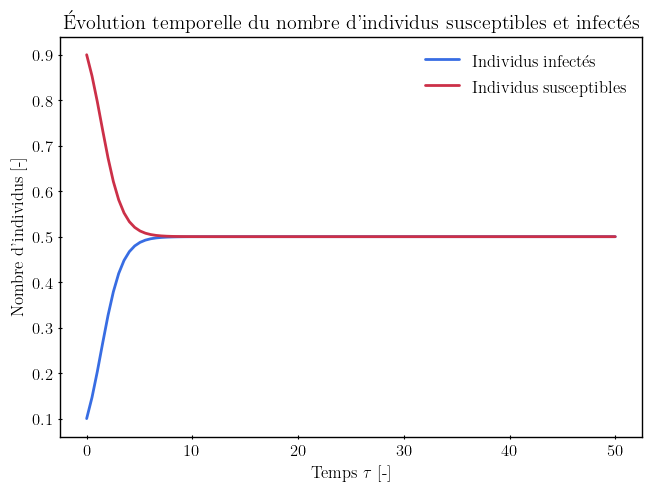

In [9]:
t = np.linspace(0, 50, 100)
i = sol_analytique(t, 0.1, 2)
s = np.ones_like(t)-i

fig = gl.Figure(r'Temps $\tau$ [-]', "Nombre d'individus [-]",
                title="Évolution temporelle du nombre d'individus susceptibles et infectés")
fig.add_elements(
    gl.Curve(t, i, label='Individus infectés'),
    gl.Curve(t, s, label='Individus susceptibles'),
)
fig.show()


Ce modèle converge vers une solution stationnaire pour laquelle $i=s=0.5$. Il s'agit de la solution $i=\frac{R_0-1}{R_0}=\frac{2-1}{2}=0.5$ trouvée dans la première partie du travail.

Dans les deux modèles, le nombres d'individus infectés augmente rapidement avant de se stabiliser. La simulation sur réseau prédit cependant un nombre plus grand d'individus infectés une fois l'équilibre atteint. Cette différence peut s'expliquer par la nature distincte des deux modèles. Le premier modèle utilisé dépend du nombre de reproduction de base $R_0=\beta/\alpha$. Ce nombre correspond approximativement au nombre moyen de cas généré par un individu infecté. Le deuxième modèle, quant à lui, dépend des paramètres de guérison et d'infection $\alpha$ et $\beta$, de même que de la structure du graphe utilisé. La première différence relève donc de la définition de $\alpha$
et $\beta$, qui ne sont pas nécessairement équivalents dans les deux modèles. La deuxième différence relève du fait que le deuxième modèle tient compte de la structure exacte des contacts entre les individus, ce que le premier modèle ne peut qu'approximer à l'aide des paramètres de contrôle.

De plus, il est difficile de comparer la vitesse d'augmentation du nombre d'individus infectés, car la première méthode fait intervenir un temps adimensionnel $\tau$ indéfini, tandis que la deuxième méthode fait plutôt intervenir des pas de temps, eux aussi indéfinis.



# Références

[1] ROY-POMERLEAU, Xavier. (2025). Processus aléatoires et méthodes Monte Carlo.